<a href="https://colab.research.google.com/github/appsstuff/GoldPricePredictionDS/blob/main/Gold_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Libraries

In [1]:
import numpy as np
import pandas as pd

# Data visualization
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Data learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Data Collection and Processing

In [ ]:
# loading the csv data to a Pandas DataFrame
gold_dataـds = pd.read_csv('gold-price-commodites2024.csv')
yahoofince_ds = pd.read_csv('YahooDS.csv')

In [ ]:
# print first 5 rows in the dataframe
gold_dataـds.head()

,gold,btc,eur,coil,boil,gas,copper,sliver
Date,,,,,,,,
2024-04-30,2.549616,2.713178,-0.689663,0.984146,0.957876,-0.829800,1.961935,1.830046
2024-04-29,2.626004,2.739226,-0.689663,0.995373,0.973947,-0.851129,1.987443,1.998134
2024-04-28,2.593716,2.697752,-0.689663,1.025481,0.986609,-0.908008,1.872654,1.960255
2024-04-26,2.554498,2.734367,-0.689663,1.057631,1.080599,-1.149740,1.847145,1.936581
2024-04-25,2.539693,2.772847,-0.689663,1.043342,1.056736,-1.128410,1.796127,1.960255


In [ ]:
yahoofince_ds.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-04-30,73.120003,73.180000,72.440002,72.720001,56.358982,8734100
2014-05-01,72.440002,73.279999,72.440002,73.089996,56.645733,7016700
2014-05-02,72.860001,73.940002,72.430000,73.860001,57.242489,6912000
2014-05-05,73.750000,75.699997,73.339996,74.980003,58.110516,6211400
2014-05-06,74.900002,74.989998,74.309998,74.440002,57.692009,4329800


In [ ]:
# print last 5 rows of the dataframe
gold_dataـds.tail()

,Date,gold,btc,eur,coil,boil,gas,copper,sliver
2588,2014-05-06,-0.678724,-0.850504,2.904449,1.856269,1.935767,1.118276,-0.078769,0.101817
2589,2014-05-05,-0.676519,-0.850673,2.904449,1.855249,1.967909,1.040069,-0.091524,0.082878
2590,2014-05-02,-0.696679,-0.849176,2.904449,1.869537,2.010278,1.025849,-0.066015,0.078143
2591,2014-05-01,-0.758105,-0.848865,2.904449,1.852187,1.969857,1.061398,-0.129787,-0.042597
2592,2014-04-30,-0.718730,-0.849470,2.904449,1.868517,1.984954,1.132496,-0.117033,-0.011820


In [ ]:
# number of rows and columns
gold_dataـds.shape


(2593, 8)

In [ ]:
yahoofince_ds.shape

(2517, 6)

In [ ]:
# getting some basic informations about the data
gold_dataـds.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2593 entries, 2024-04-30 to 2014-04-30
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   gold    2593 non-null   float64
 1   btc     2593 non-null   float64
 2   eur     2593 non-null   float64
 3   coil    2593 non-null   float64
 4   boil    2593 non-null   float64
 5   gas     2593 non-null   float64
 6   copper  2593 non-null   float64
 7   sliver  2593 non-null   float64
dtypes: float64(8)
memory usage: 182.3 KB


In [ ]:
# checking the number of missing values
# Fill null values with a constant

gold_dataـds['Date']     = pd.to_datetime(gold_dataـds['Date'])
gold_dataـds = gold_dataـds.fillna(0)
yahoofince_ds = yahoofince_ds.fillna(0)
gold_dataـds.isnull().sum()
yahoofince_ds.isnull().sum()


Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
# getting the statistical measures of the data
gold_dataـds.describe()

,Date,gold,btc,eur,coil,boil,gas,copper,sliver
count,2593,2593.000000,2593.000000,2593.000000,2593.000000,2593.000000,2593.000000,2593.000000,2593.000000
mean,2019-05-05 09:26:26.887774720,1524.063768,15481.965870,1.131404,63.124828,67.310995,3.227127,3.121759,19.219927
min,2014-04-30 00:00:00,1049.600000,0.000000,0.000000,-37.630000,0.000000,0.000000,0.000000,0.000000
25%,2016-10-31 00:00:00,1250.300000,707.800000,1.090000,48.620000,51.740000,2.500000,2.620000,16.220000
50%,2019-05-08 00:00:00,1349.900000,8211.200000,1.120000,59.700000,65.210000,2.820000,2.980000,17.800000
75%,2021-11-09 00:00:00,1818.700000,26264.000000,1.170000,75.890000,80.780000,3.420000,3.760000,23.060000
max,2024-04-30 00:00:00,2401.400000,72974.000000,1.390000,123.700000,127.980000,9.650000,4.940000,29.420000
std,NaN,317.515461,17701.123874,0.089052,19.599628,20.537941,1.406787,0.784194,4.224792


In [ ]:
yahoofince_ds.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2.517000e+03
mean,80.493596,81.251247,79.704577,80.484978,69.652706,7.118841e+06
std,14.609332,14.655447,14.559539,14.619368,12.802565,4.045470e+06
min,52.009998,52.720001,51.720001,52.130001,44.640026,1.315400e+06
25%,69.309998,70.040001,68.690002,69.410004,60.096897,4.616100e+06
50%,78.050003,78.849998,77.610001,78.269997,67.286407,6.211000e+06
75%,93.930000,94.790001,92.949997,93.849998,78.448105,8.402500e+06
max,113.349998,113.650002,112.449997,113.449997,103.601967,5.023440e+07


In [ ]:
# Data Normalization : Data normalization involves adjusting measurement values of different scales to a common scale between all columns
# Apply Single Feature Scaling :  transforms each value in a column into a number between 0 and 1
from sklearn.preprocessing import StandardScaler

gold_data = gold_dataـds

# ِExample for Standard Scaler: gold_data['gold'] = gold_data['gold'] / gold_data['gold'].max()
# create a StandardScaler object
scaler = StandardScaler(copy=True)
cols_to_scale = ['gold',	'btc',	'eur'	,'coil',	'boil'	,'gas',	'copper'	,'sliver']

# fit and transform the data
scaled_data = scaler.fit(gold_data[cols_to_scale])

# create a new DataFrame with the scaled data
gold_data[cols_to_scale] = scaler.transform(gold_data[cols_to_scale])
gold_data.head()



,Date,gold,btc,eur,coil,boil,gas,copper,sliver
0,2024-04-30,2.549616,2.713178,-0.689663,0.984146,0.957876,-0.829800,1.961935,1.830046
1,2024-04-29,2.626004,2.739226,-0.689663,0.995373,0.973947,-0.851129,1.987443,1.998134
2,2024-04-28,2.593716,2.697752,-0.689663,1.025481,0.986609,-0.908008,1.872654,1.960255
3,2024-04-26,2.554498,2.734367,-0.689663,1.057631,1.080599,-1.149740,1.847145,1.936581
4,2024-04-25,2.539693,2.772847,-0.689663,1.043342,1.056736,-1.128410,1.796127,1.960255


In [ ]:
#Create index  for InvestingDS
gold_data.set_index('Date', inplace=True)
gold_data.index



DatetimeIndex(['2024-04-30', '2024-04-29', '2024-04-28', '2024-04-26',
               '2024-04-25', '2024-04-24', '2024-04-23', '2024-04-22',
               '2024-04-19', '2024-04-18',
               ...
               '2014-05-13', '2014-05-12', '2014-05-09', '2014-05-08',
               '2014-05-07', '2014-05-06', '2014-05-05', '2014-05-02',
               '2014-05-01', '2014-04-30'],
              dtype='datetime64[ns]', name='Date', length=2593, freq=None)

In [ ]:
#Create index  for yahooDS
yahoofince_ds.set_index('Date', inplace=True)
yahoofince_ds.index


Index(['2014-04-30', '2014-05-01', '2014-05-02', '2014-05-05', '2014-05-06',
       '2014-05-07', '2014-05-08', '2014-05-09', '2014-05-12', '2014-05-13',
       ...
       '2024-04-16', '2024-04-17', '2024-04-18', '2024-04-19', '2024-04-22',
       '2024-04-23', '2024-04-24', '2024-04-25', '2024-04-26', '2024-04-29'],
      dtype='object', name='Date', length=2517)

In [ ]:
# DEFINE VARIABLES
GOLD   = gold_data['gold']
SILVER = gold_data['sliver']
COPPER = gold_data['copper']
EUR    = gold_data['eur']
BCOIN  = gold_data['btc']
COIL  = gold_data['coil']
BOIL   = gold_data['boil']
GAS    = gold_data['gas']


<Axes: xlabel='Date'>

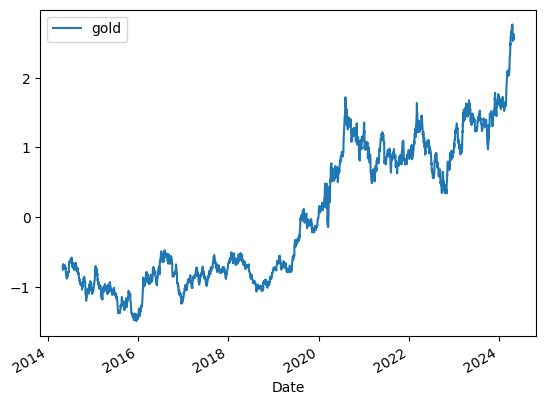

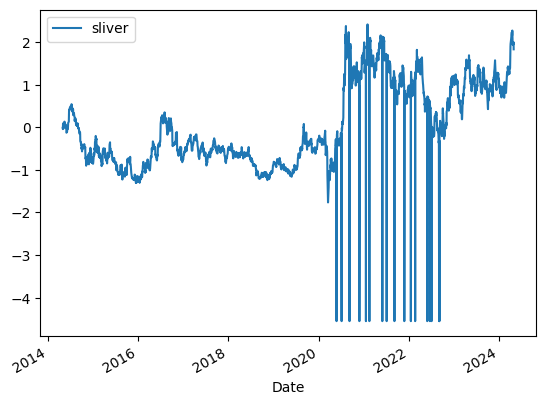

In [ ]:
gold_data.plot.line(y="gold",use_index=True)
gold_data.plot.line(y="sliver",use_index=True)


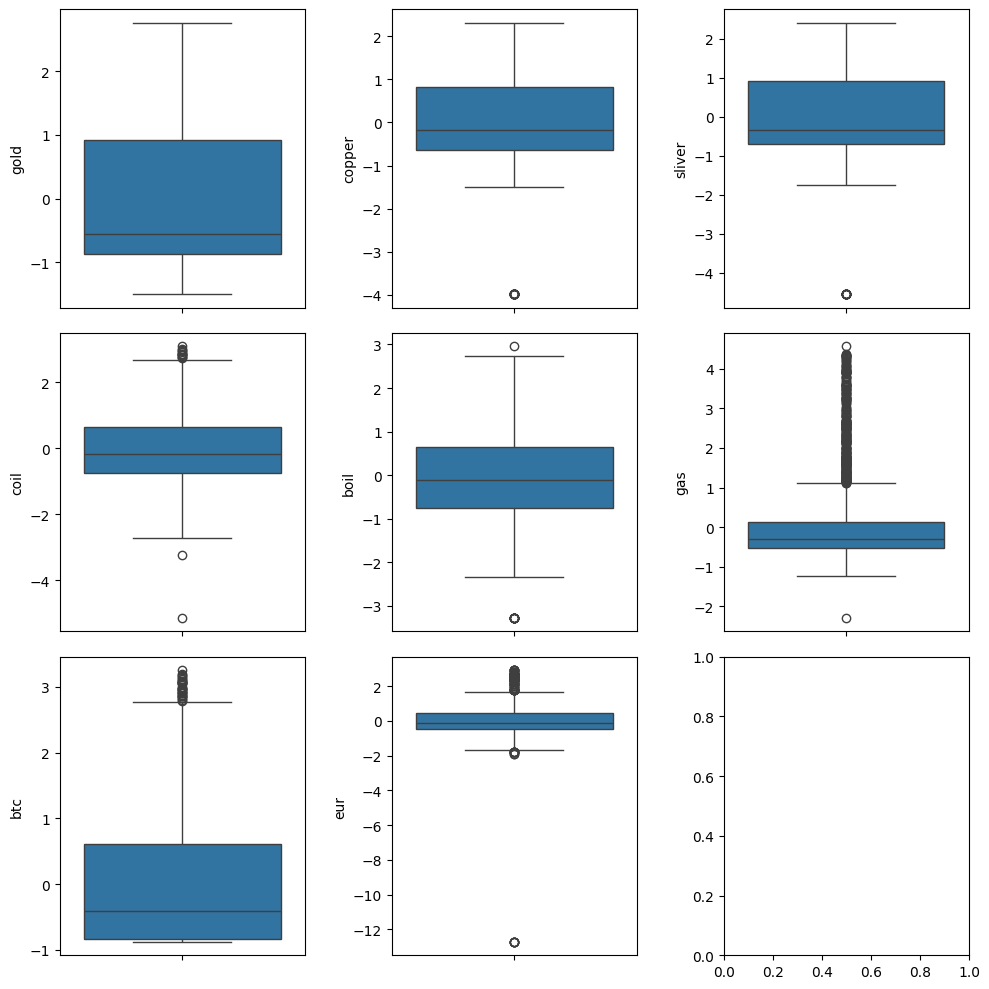

In [ ]:
'''
Detect Outliers
Outliers are extreme values that fall a long way outside of the other observations.
Created the separate function to detect outliers for the dataset. Here used the boxplot using Seaborn library
'''

def detectOutliers():
    fig, axs = plt.subplots(3,3, figsize = (10,10))
    plt1 = sns.boxplot(GOLD,   ax = axs[0,0])
    plt2 = sns.boxplot(COPPER, ax = axs[0,1])
    plt3 = sns.boxplot(SILVER, ax = axs[0,2])

    plt1 = sns.boxplot(COIL,   ax = axs[1,0])
    plt2 = sns.boxplot(BOIL,   ax = axs[1,1])
    plt3 = sns.boxplot(GAS,    ax = axs[1,2])

    plt1 = sns.boxplot(BCOIN,    ax = axs[2,0])
    plt2 = sns.boxplot(EUR,    ax = axs[2,1])
    plt.tight_layout()
detectOutliers()


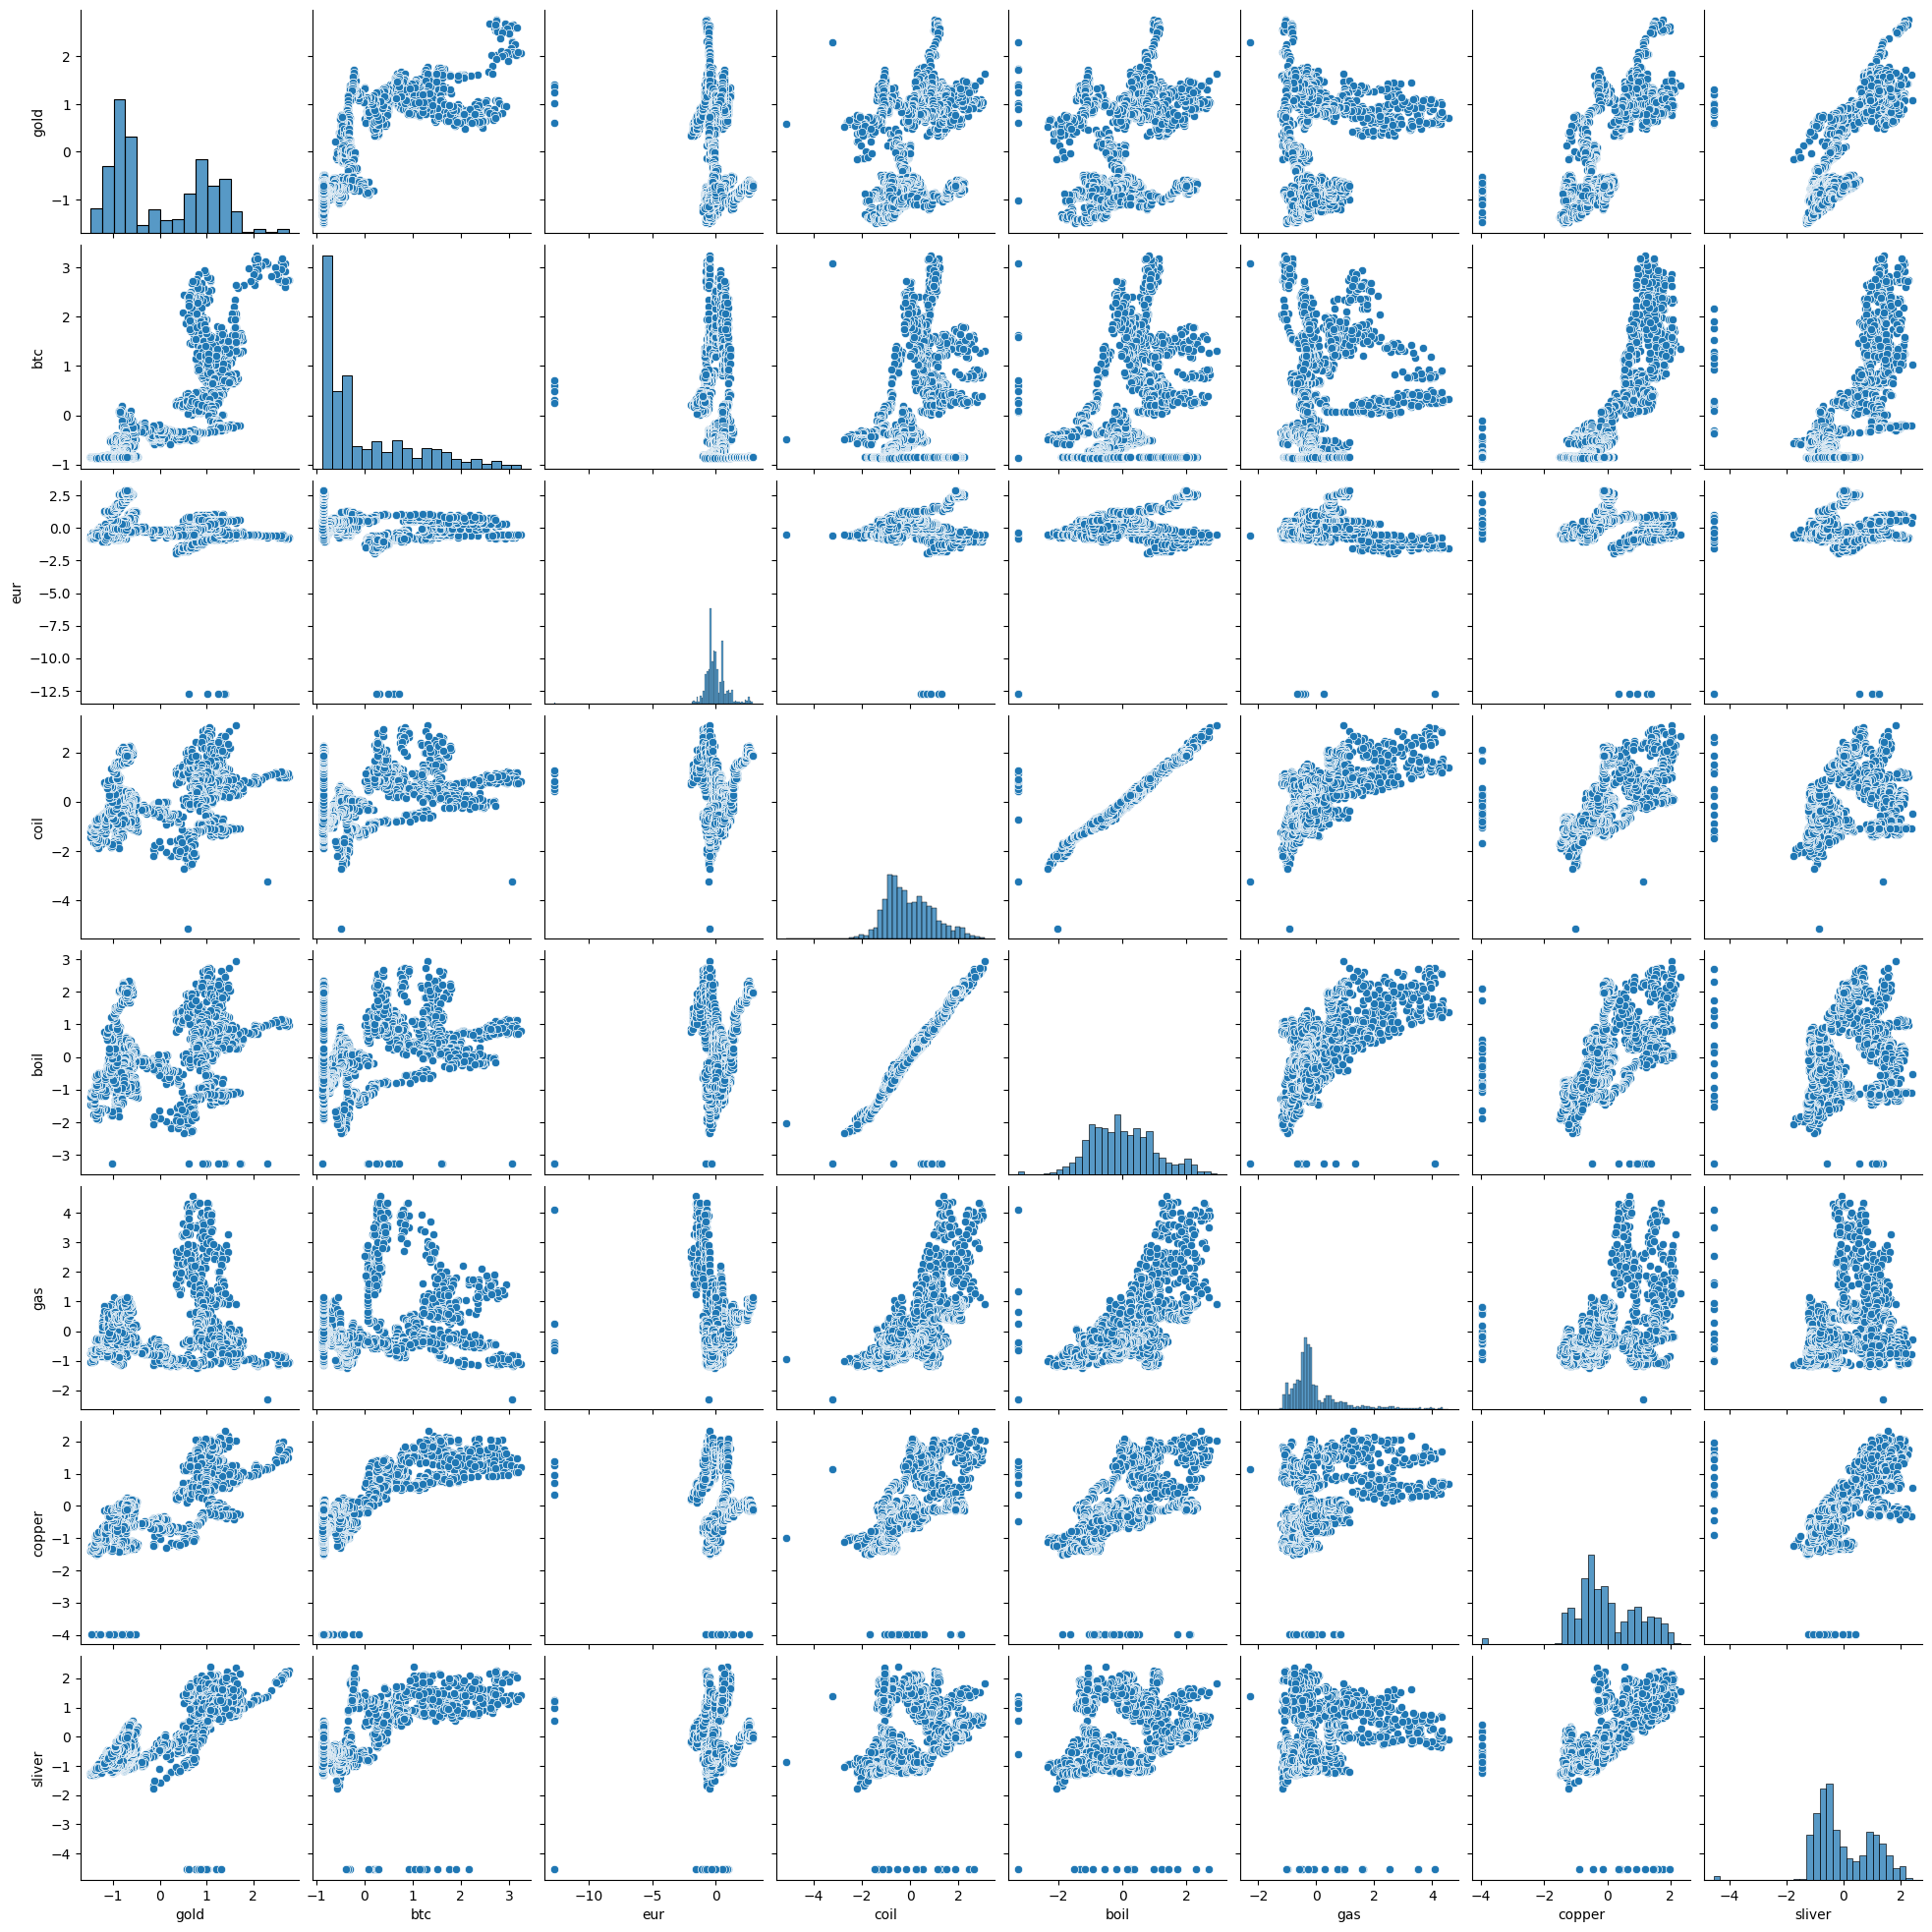

In [ ]:
# sns.pairplot(gold_data)
# plt.show()

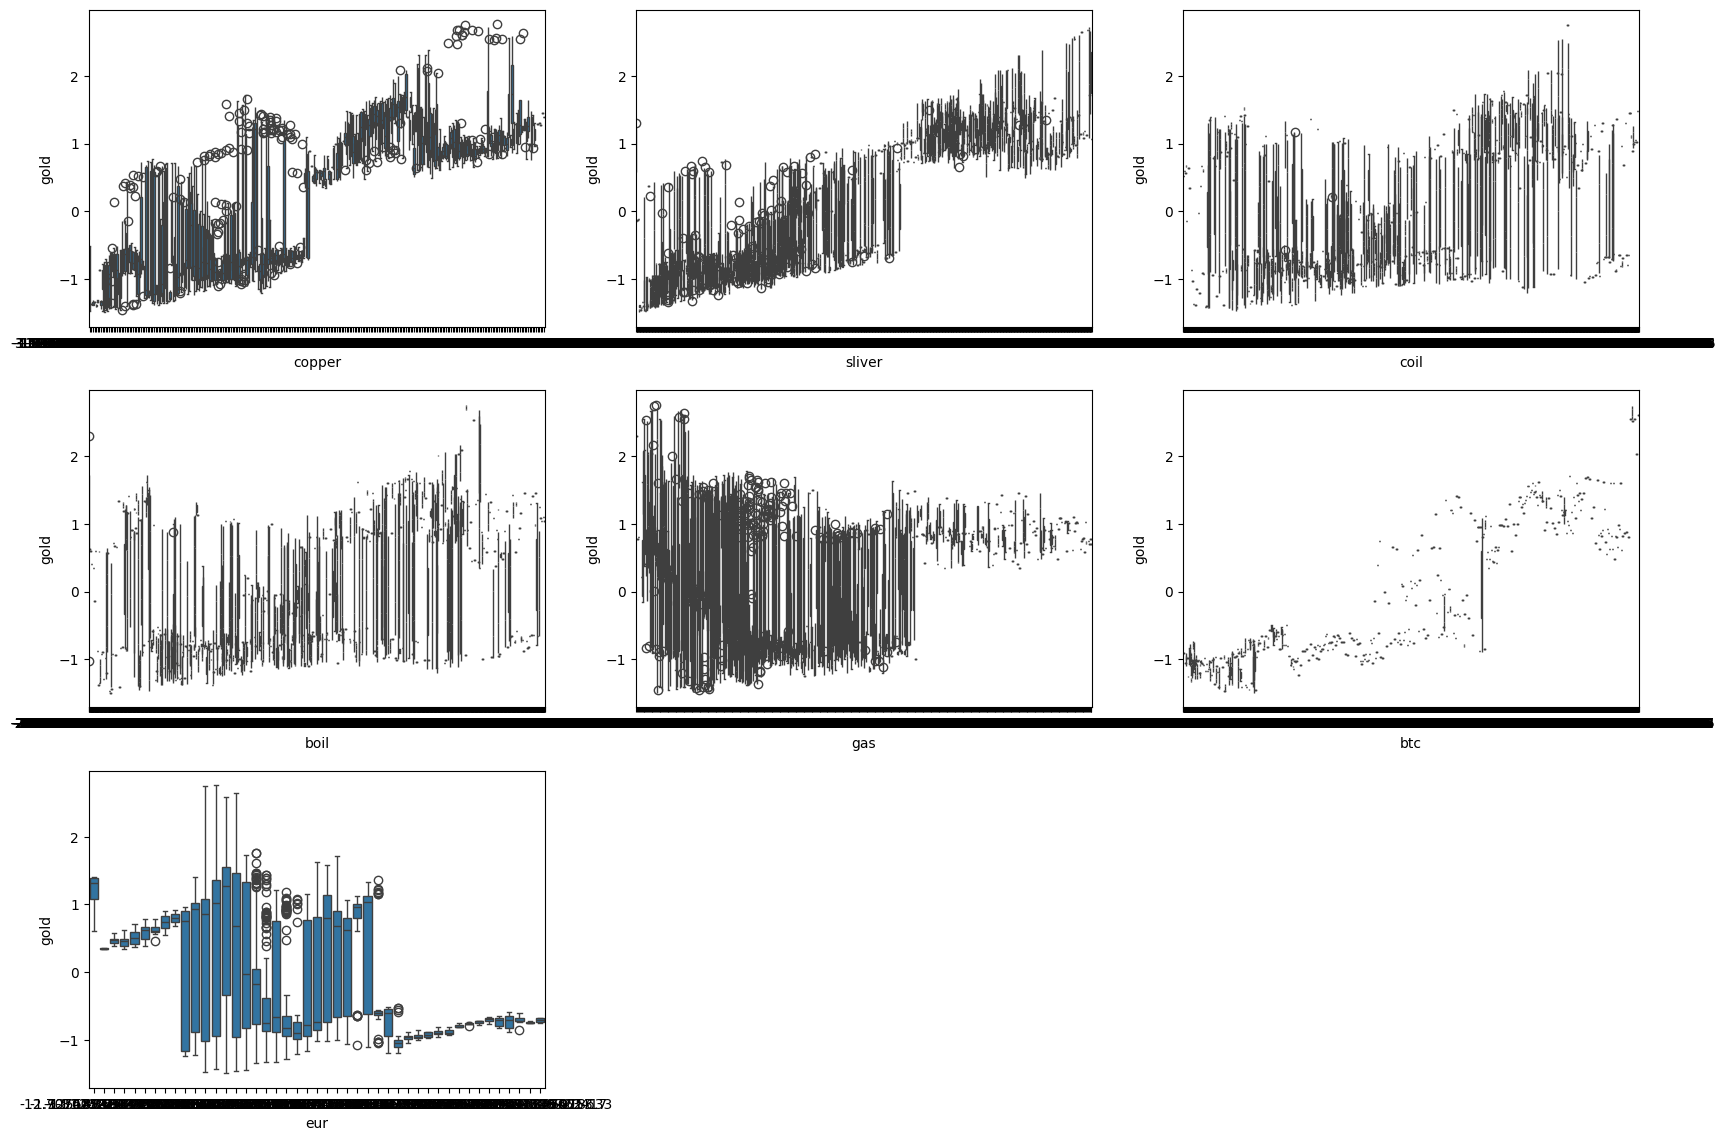

In [ ]:
# plt.figure(figsize=(20, 14))
# plt.subplot(3,3,1)
# sns.boxplot(x='copper', y='gold', data=gold_data)
# plt.subplot(3,3,2)
# sns.boxplot(x='sliver', y='gold', data=gold_data)
# plt.subplot(3,3,3)
# sns.boxplot(x='coil', y='gold', data=gold_data)
# plt.subplot(3,3,4)
# sns.boxplot(x='boil', y='gold', data=gold_data)
# plt.subplot(3,3,5)
# sns.boxplot(x='gas', y='gold', data=gold_data)
# plt.subplot(3,3,6)
# sns.boxplot(x='btc', y='gold', data=gold_data)
# plt.subplot(3,3,7)
# sns.boxplot(x='eur', y='gold', data=gold_data)
# plt.show()


<ipython-input-22-d7cae00fa645>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  series1=sns.lineplot(x='Date',y='value',data=dataDF , palette=['red'])


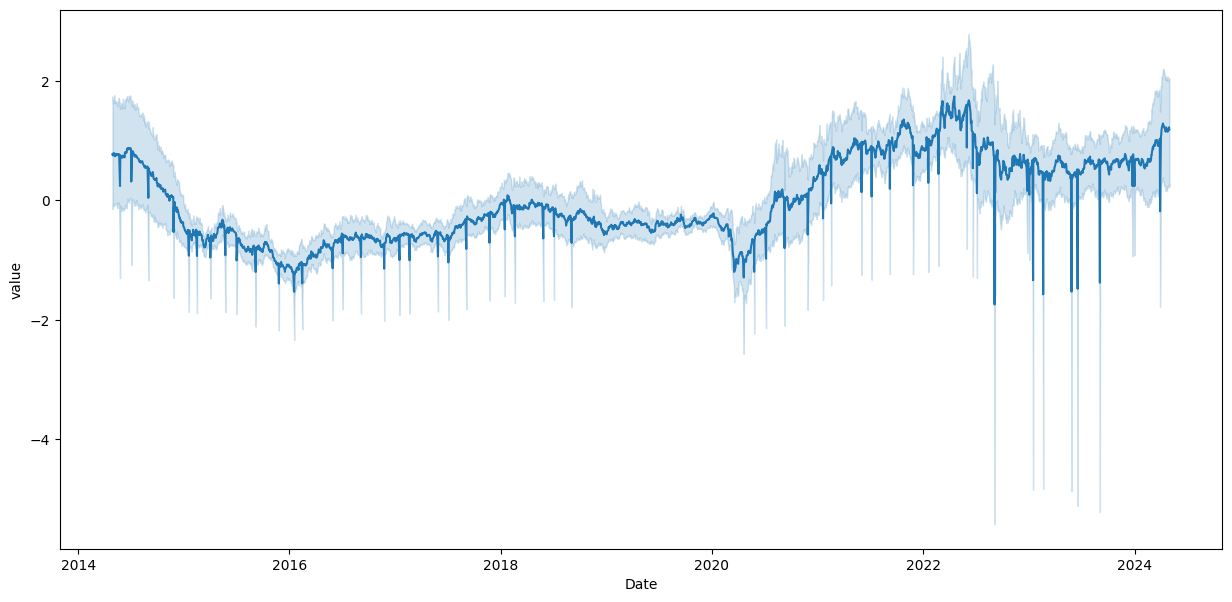

In [ ]:
plt.figure(figsize=(15,7))
dataDF=pd.melt(gold_data, ['Date'])
series1=sns.lineplot(x='Date',y='value',data=dataDF , palette=['red'])



Correlation:
1. Positive Correlation
2. Negative Correlation

In [ ]:
df_commoidates = gold_data.drop(['Date'],axis=1)
correlation = df_commoidates.corr()

<Axes: >

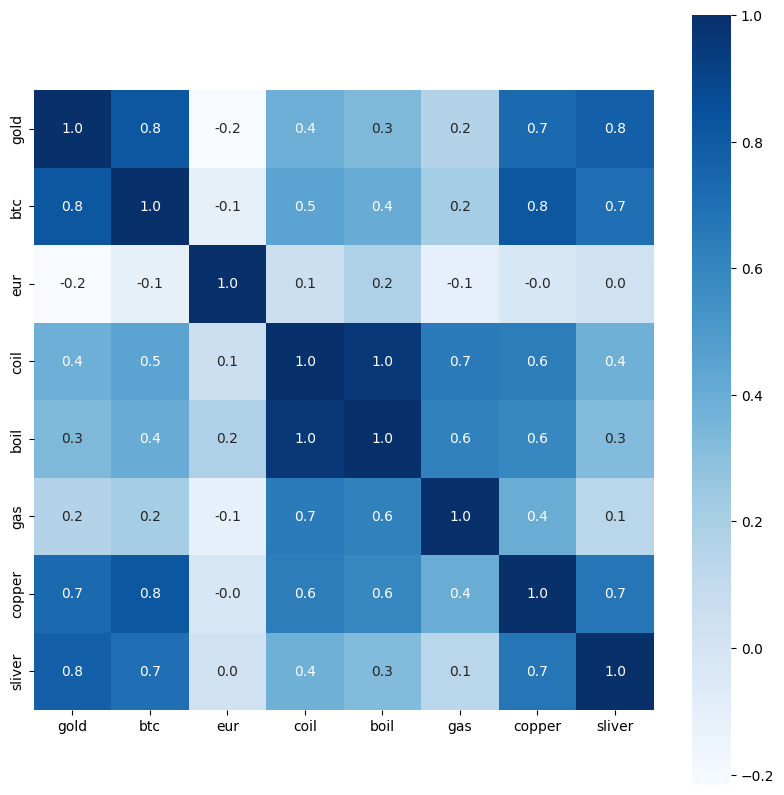

In [ ]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':10}, cmap='Blues')

In [ ]:
# correlation values of GLD
print(correlation['gold'])

gold      1.000000
btc       0.815529
eur      -0.216210
coil      0.386263
boil      0.332238
gas       0.156357
copper    0.732529
sliver    0.776556
Name: gold, dtype: float64


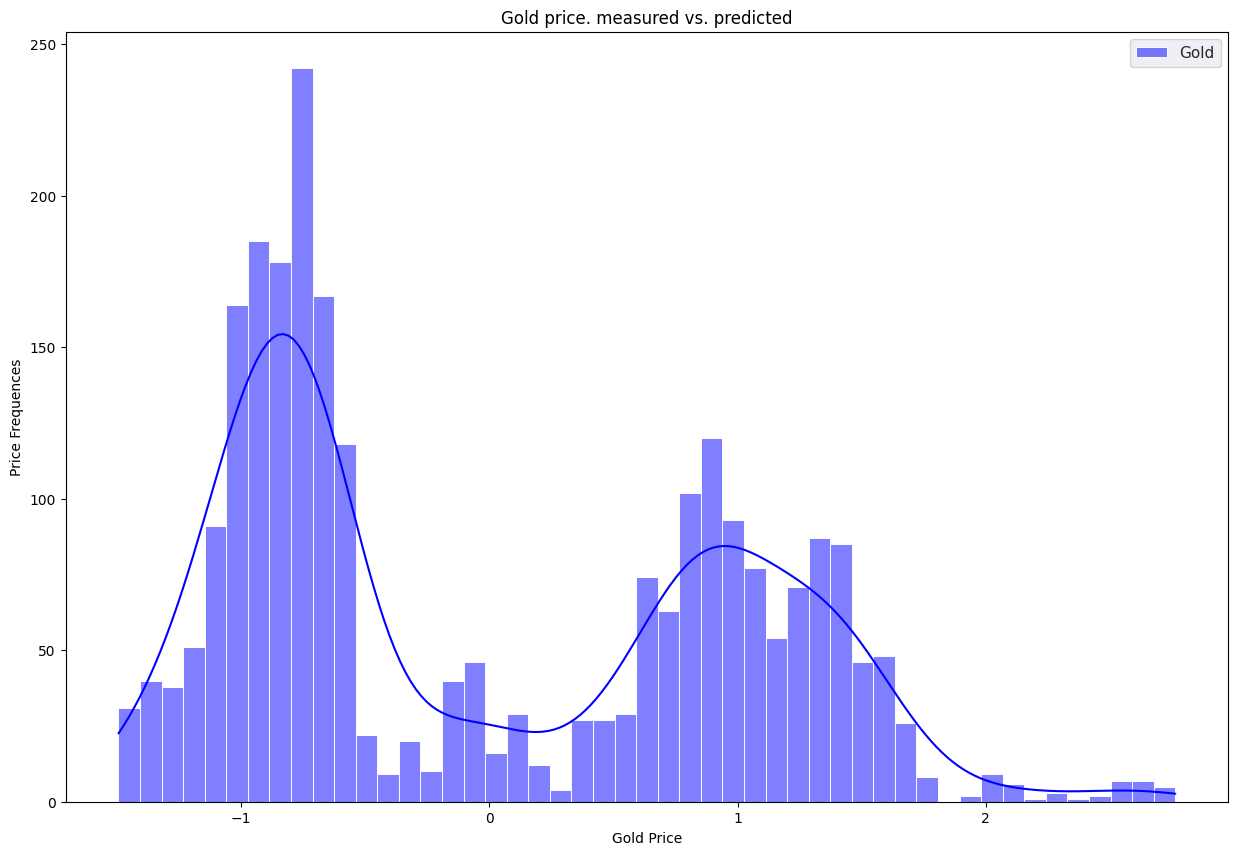

In [ ]:
# checking the distribution of the GLD Price
plt.style.use('tableau-colorblind10')
plt.title('Gold price. measured vs. predicted')
sns.set_theme()
binsLength = int(len(gold_data)/52)
ax = sns.histplot(data= gold_data['gold'], bins=binsLength , kde=True, color='Blue', label='Gold')

ax.set(xlabel="Gold Price")
ax.set(ylabel="Price Frequences")
ax.set_axisbelow(True)
ax.figure.set_size_inches(15, 10)

# sns.histplot(x1 , bins=60,  color='red', kde=True, label='pred')
# sns.histplot(y1 , bins=60,  color='Blue', kde=True, label='measured')
plt.legend()

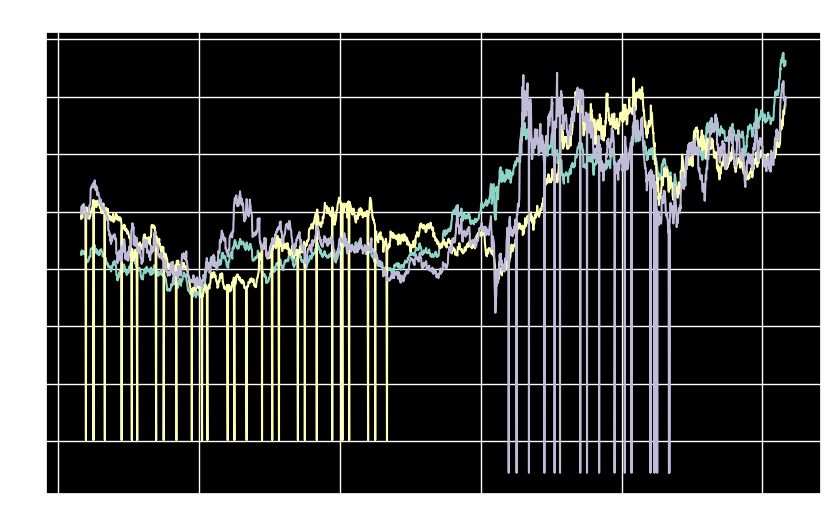

In [ ]:
import matplotlib.pyplot as plt

xDropDate = gold_data['gold']

# dFram_OnlyGoldY = gold_data['gold']

# gold_data.plot(x="Date", marker = '*', ms = 2)
plt.figure(figsize=(10,6))
plt.style.use('dark_background')
plt.title('Gold Price and Commodites within 10 years')
plt.plot(gold_data['Date'], gold_data['gold'])
plt.plot(gold_data['Date'], gold_data['copper'])
plt.plot(gold_data['Date'], gold_data['sliver'])

ax.legend()



# Setting the background color of the plot
# using set_facecolor() method



Splitting the Features and Target

In [ ]:
gold_data = gold_data.fillna(0)
dFram_withoutGoldX = gold_data.drop(['Date','gold'],axis=1)
dFram_OnlyGoldY = gold_data['gold']

In [ ]:
print(dFram_withoutGoldX)

           btc       eur      coil      boil       gas    copper    sliver
0     2.713178 -0.689663  0.984146  0.957876 -0.829800  1.961935  1.830046
1     2.739226 -0.689663  0.995373  0.973947 -0.851129  1.987443  1.998134
2     2.697752 -0.689663  1.025481  0.986609 -0.908008  1.872654  1.960255
3     2.734367 -0.689663  1.057631  1.080599 -1.149740  1.847145  1.936581
4     2.772847 -0.689663  1.043342  1.056736 -1.128410  1.796127  1.960255
...        ...       ...       ...       ...       ...       ...       ...
2588 -0.850504  2.904449  1.856269  1.935767  1.118276 -0.078769  0.101817
2589 -0.850673  2.904449  1.855249  1.967909  1.040069 -0.091524  0.082878
2590 -0.849176  2.904449  1.869537  2.010278  1.025849 -0.066015  0.078143
2591 -0.848865  2.904449  1.852187  1.969857  1.061398 -0.129787 -0.042597
2592 -0.849470  2.904449  1.868517  1.984954  1.132496 -0.117033 -0.011820

[2593 rows x 7 columns]


In [ ]:
print(dFram_OnlyGoldY)

0       2.549616
1       2.626004
2       2.593716
3       2.554498
4       2.539693
          ...   
2588   -0.678724
2589   -0.676519
2590   -0.696679
2591   -0.758105
2592   -0.718730
Name: gold, Length: 2593, dtype: float64


Splitting into Training data and Test Data

In [ ]:

X_train, X_test, Y_train, Y_test = train_test_split(dFram_withoutGoldX, dFram_OnlyGoldY, test_size = 0.2, random_state=0)


Model Training:

> Add blockquote


Random Forest Regressor

In [ ]:
randomForest_regressor = RandomForestRegressor(n_estimators=100)

In [ ]:
# training the model

randomForest_regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation

In [ ]:
# prediction on Test Data
randomForest_regressor_predictor = randomForest_regressor.predict(X_test)

In [ ]:
print(randomForest_regressor_predictor)

[ 1.27872050e+00 -8.46262998e-01  6.33641683e-01 -1.12291705e+00
  2.07917319e-01  1.57287630e+00  7.86992924e-01 -9.42072086e-01
  4.71019815e-01 -8.43919353e-01 -9.68056934e-01  8.62065164e-01
  6.58470460e-01  1.26957273e+00  1.39871576e+00  1.60049603e+00
 -6.99671787e-01  1.35947860e+00  1.11133889e+00  1.29294933e+00
 -7.84430463e-01  1.30732935e+00 -3.65834685e-01 -5.17157287e-01
  8.35746409e-01 -7.47949613e-01 -6.23544277e-01 -9.10930589e-01
 -1.55498851e-01  1.45995293e+00 -8.18195960e-01 -1.05189894e+00
  6.65583296e-01 -7.38990841e-01 -1.39247717e+00  1.15498613e+00
 -1.35613178e+00  1.40001673e+00 -1.36319736e+00 -1.45419001e+00
 -4.40563568e-01 -1.04159824e+00  1.34367475e+00  1.01120477e+00
  8.09824562e-01  7.88930211e-01 -7.85391231e-01 -7.13793508e-01
 -1.03520677e+00  9.58016004e-01 -9.16818051e-01 -5.84804834e-01
 -7.33701890e-01 -5.67249547e-01  2.08939013e+00 -1.20939881e+00
  7.31636913e-01 -7.30381726e-01 -6.20945477e-01  8.42956898e-01
 -1.03445076e+00 -9.81977

In [ ]:
# R squared error
error_score = metrics.r2_score(Y_test, randomForest_regressor_predictor)
print("R squared error : ", error_score)

R squared error :  0.9960287288165292


Compare the Actual Values and Predicted Values in a Plot

In [ ]:
Y_test = list(Y_test)

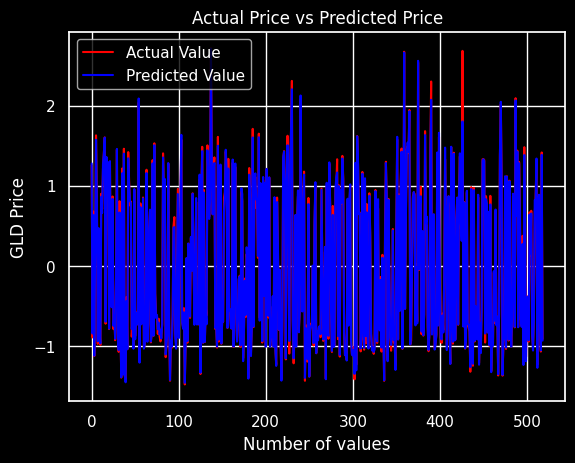

In [ ]:
plt.plot(Y_test, color='red',                label = 'Actual Value')
plt.plot(randomForest_regressor_predictor, color='blue', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

R squared error :  0.7745292966260391


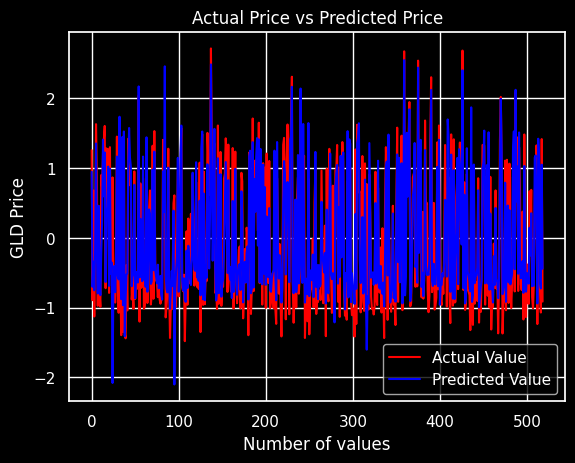

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# Build the regression model
liner_regressor = LinearRegression()
liner_regressor.fit(X_train, Y_train)

# Make predictions
liner_regressor_predictor = liner_regressor.predict(X_test)

# Evaluate the model performance
error_score = metrics.r2_score(Y_test, liner_regressor_predictor)
print("R squared error : ", error_score)

Y_test = list(Y_test)
plt.plot(Y_test, color='red', label = 'Actual Value')
plt.plot(liner_regressor_predictor, color='blue', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  accuracy_score
from sklearn import preprocessing
from sklearn import utils

#convert y values to categorical values
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(Y_train)

# logreg=LogisticRegression()
# logreg=LogisticRegression.fit(X_train, y_transformed)
# logreg.fit(X_train,y_transformed)
# logisticRegression_predictor = logreg.predict(X_test)

# accuracy=accuracy_score(X_test,logisticRegression_predictor)
# print(accuracy)

In [ ]:
# use YahooFinance DS to predect the Tomorrow price
# add two addtional columns and remove unwanted columns ( Tomorrow Price, Target Price)


yahds = yahoofince_ds
# del yahoofince_ds['Adj Close']
# del yahoofince_ds['Volume']
yahds['Tomorrow'] = yahds["Close"].shift(-1)
#Taret price 1 is grether than yesterday close , 0 is less
yahoofince_ds['Target']   = (yahoofince_ds['Tomorrow']>yahoofince_ds['Close']).astype(int)
yahoofince_ds.head()


,Date,Open,High,Low,Close,Tomorrow,Target
0,2014-04-30,73.120003,73.180000,72.440002,72.720001,73.089996,1
1,2014-05-01,72.440002,73.279999,72.440002,73.089996,73.860001,1
2,2014-05-02,72.860001,73.940002,72.430000,73.860001,74.980003,1
3,2014-05-05,73.750000,75.699997,73.339996,74.980003,74.440002,0
4,2014-05-06,74.900002,74.989998,74.309998,74.440002,75.900002,1
